<a href="https://www.kaggle.com/code/talibilat/dogs-and-cats?scriptVersionId=105849890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'talibilat'                                     # username from the json file
os.environ['KAGGLE_KEY'] = '503e89f55d139912655d5eee68534a10'                   # key from the json file
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

dogs-vs-cats-redux-kernels-edition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
def unzip(filename):
  with ZipFile(filename, 'r') as zip:
    zip.extractall()
    print('Done')

In [4]:
unzip('dogs-vs-cats-redux-kernels-edition.zip')

Done


In [5]:
unzip('test.zip')
unzip('train.zip')

Done
Done


In [10]:
pwd

'/kaggle/working'

In [12]:
ls

__notebook_source__.ipynb               sample_submission.csv  train/
cats_and_dogs_small/                    test/                  train.zip
dogs-vs-cats-redux-kernels-edition.zip  test.zip


In [7]:
data_dir_list = os.listdir('train')

path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print(file_count)

original_dataset_dir = './train'
base_dir = './cats_and_dogs_small'
os.mkdir(base_dir)

25000


Creating Individial directories for Train, Test and Validation

In [11]:
# Creating Train, Test and Validaiton directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Training directory for Cats and Dogs
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Validation directory for Cats and Dogs
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Test directory for Cats and Dogs
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [12]:
ls -ltr

total 1668620
---------- 1 root root       263 Sep 16 21:46 __notebook_source__.ipynb
-rw-r--r-- 1 root root 853083403 Sep 16 21:46 dogs-vs-cats-redux-kernels-edition.zip
-rw-r--r-- 1 root root    113903 Sep 16 21:47 sample_submission.csv
-rw-r--r-- 1 root root 284478493 Sep 16 21:47 test.zip
-rw-r--r-- 1 root root 569918665 Sep 16 21:47 train.zip
drwxr-xr-x 2 root root    278528 Sep 16 21:47 test/
drwxr-xr-x 2 root root    757760 Sep 16 21:47 train/
drwxr-xr-x 5 root root      4096 Sep 16 21:49 cats_and_dogs_small/


In [36]:
cd ..

/kaggle/working


In [37]:
ls -ltr

total 1668600
---------- 1 root root       263 Sep 16 20:59 __notebook_source__.ipynb
-rw-r--r-- 1 root root 853083403 Sep 16 20:59 dogs-vs-cats-redux-kernels-edition.zip
-rw-r--r-- 1 root root    113903 Sep 16 21:23 sample_submission.csv
-rw-r--r-- 1 root root 284478493 Sep 16 21:23 test.zip
-rw-r--r-- 1 root root 569918665 Sep 16 21:23 train.zip
drwxr-xr-x 2 root root    278528 Sep 16 21:23 test/
drwxr-xr-x 2 root root    749568 Sep 16 21:23 train/
drwxr-xr-x 5 root root      4096 Sep 16 21:30 cats_and_dogs_small/


Creating a function which will copy our data from original directory to small directory


In [13]:
import shutil

def copyfiles(a,b,c,d): 
  fnames = [a.format(i) for i in range(b,c)]
  for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(d, fname)
    shutil.copyfile(src,dst)


Transferring all the subset data to the designated folder

In [14]:
copyfiles('cat.{}.jpg',0,9000,train_cats_dir)
copyfiles('cat.{}.jpg',9000,11500,validation_cats_dir)
copyfiles('cat.{}.jpg',11500,12500,test_cats_dir)
copyfiles('dog.{}.jpg',0,9000,train_dogs_dir)
copyfiles('dog.{}.jpg',9000,11500,validation_dogs_dir)
copyfiles('dog.{}.jpg',11500,12500,test_dogs_dir)

Printing total number of Images

In [15]:
import pandas as pd
d = {'Cat Images' : [len(os.listdir(train_cats_dir)),len(os.listdir(test_cats_dir)),len(os.listdir(validation_cats_dir))],
     'Dog Images' : [len(os.listdir(train_dogs_dir)),len(os.listdir(test_dogs_dir)),len(os.listdir(validation_dogs_dir))]
     }
pd.DataFrame(data=d, index=["Train", "Test", "Validation"])

,Cat Images,Dog Images
Train,9000,9000
Test,1000,1000
Validation,2500,2500


#DEEP LEARNING
Building Deep Learning Model

In [29]:
from keras.layers.pooling import MaxPooling2D
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (250,250,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 128)      

In [30]:
from tensorflow import keras
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range= 40,
                                   width_shift_range= 0.2, 
                                   height_shift_range= 0.2, 
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)



test_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range= 40,
                                   width_shift_range= 0.2, 
                                   height_shift_range= 0.2, 
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)

t_datagen = ImageDataGenerator(rescale= 1./255)


train_generator  = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(250,250),
                                                     batch_size=32,
                                                     class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (250,250),
                                                        batch_size = 32,
                                                        class_mode = 'binary')


test_generator = t_datagen.flow_from_directory(test_dir,
                                               target_size = (250,250),
                                               batch_size = 32,
                                               class_mode = 'binary')



Found 18000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps = 50)

model.save('cats_and_dogs_small_1.h5')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 76s 756ms/step - loss: 0.6759 - acc: 0.5794 - val_loss: 0.6896 - val_acc: 0.5575
Epoch 2/30
100/100 [==============================] - 76s 758ms/step - loss: 0.6736 - acc: 0.5844 - val_loss: 0.6683 - val_acc: 0.5806
Epoch 3/30
100/100 [==============================] - 76s 757ms/step - loss: 0.6676 - acc: 0.5959 - val_loss: 0.6448 - val_acc: 0.6112
Epoch 4/30
100/100 [==============================] - 75s 757ms/step - loss: 0.6485 - acc: 0.6169 - val_loss: 0.6195 - val_acc: 0.6744
Epoch 5/30
100/100 [==============================] - 74s 742ms/step - loss: 0.6461 - acc: 0.6356 - val_loss: 0.6295 - val_acc: 0.6431
Epoch 6/30
100/100 [==============================] - 75s 751ms/step - loss: 0.6341 - acc: 0.6419 - val_loss: 0.6206 - val_acc: 0.6562
Epoch 7/30
100/100 [==============================] - 74s 747ms/step - loss: 0.6314 - acc: 0.6513 - val_loss: 0.6009 - val_acc: 0.6825
Epoch 8/30
100/100 [==============================] - 7

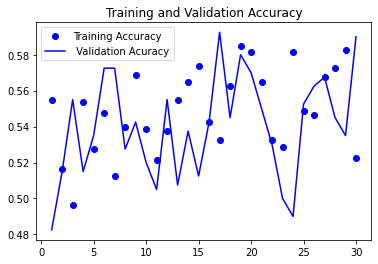

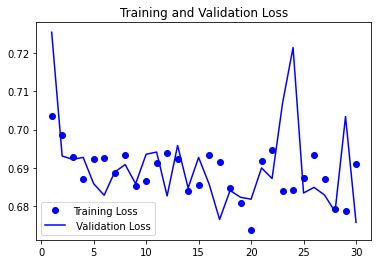

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1 )
plt.plot(epochs, acc, 'bo' , label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = ' Validation Acuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo' , label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = ' Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()


In [37]:
model.evaluate(test_generator)

250/250 [==============================] - 7s 30ms/step - loss: 0.6774 - acc: 0.5915


[0.6773502230644226, 0.5914999842643738]

#Taining and Testing on full dataset

Found 0 images belonging to 0 classes.

Found 0 images belonging to 0 classes.
